In [1]:
import os
from pathlib import Path

def root_dir(marker="EXPLib"):
    cwd = Path.cwd()
    # if cwd already contains the marker
    if (cwd / marker).is_dir():
        return cwd
    # otherwise walk up the parents
    for p in cwd.parents:
        if (p / marker).is_dir():
            return p
    raise FileNotFoundError(f"Root marker '{marker}' not found")

os.chdir(root_dir())
#print(os.getcwd())

In [ ]:
from EXPLib.xai_library.model_explainers.extract_layer_activation import extract_activations
from EXPLib.xai_library.model_explainers.model_utils.toymodel_utils import load_and_configure_model, preprocess_image
import torch
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
image_path = './EXPLib/datasets/Camera/toy_model_v1_inference/dev/images'
image_file = 'rgb_0000100.png'
weight_path = './EXPLib/dl_component/CNN/Object_Detectors/toy_model_v1/'
weight_file = 'aikonet_toymodelv1_ssdlite.pth'

model_name = 'ssdlite320_mobilenet_v3_large'
num_classes = 2

############################################################################
# Check if a GPU is available and if not, use a CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
model = load_and_configure_model(model_name, weight_path, weight_file, num_classes, device)
model.eval()
# load image
image = preprocess_image(image_path, image_file, device)
processed_torch_inputs=image

In [5]:
## Extract neuron activation patterns at a selected layer, in this example it takes model.backbone.features [-1][3][0]
extractor=extract_activations.FeatureExtractor(model,[model.backbone.features[-1][3][0]])
features = extractor(image)
features_np = [f.detach().cpu().numpy() for f in features]

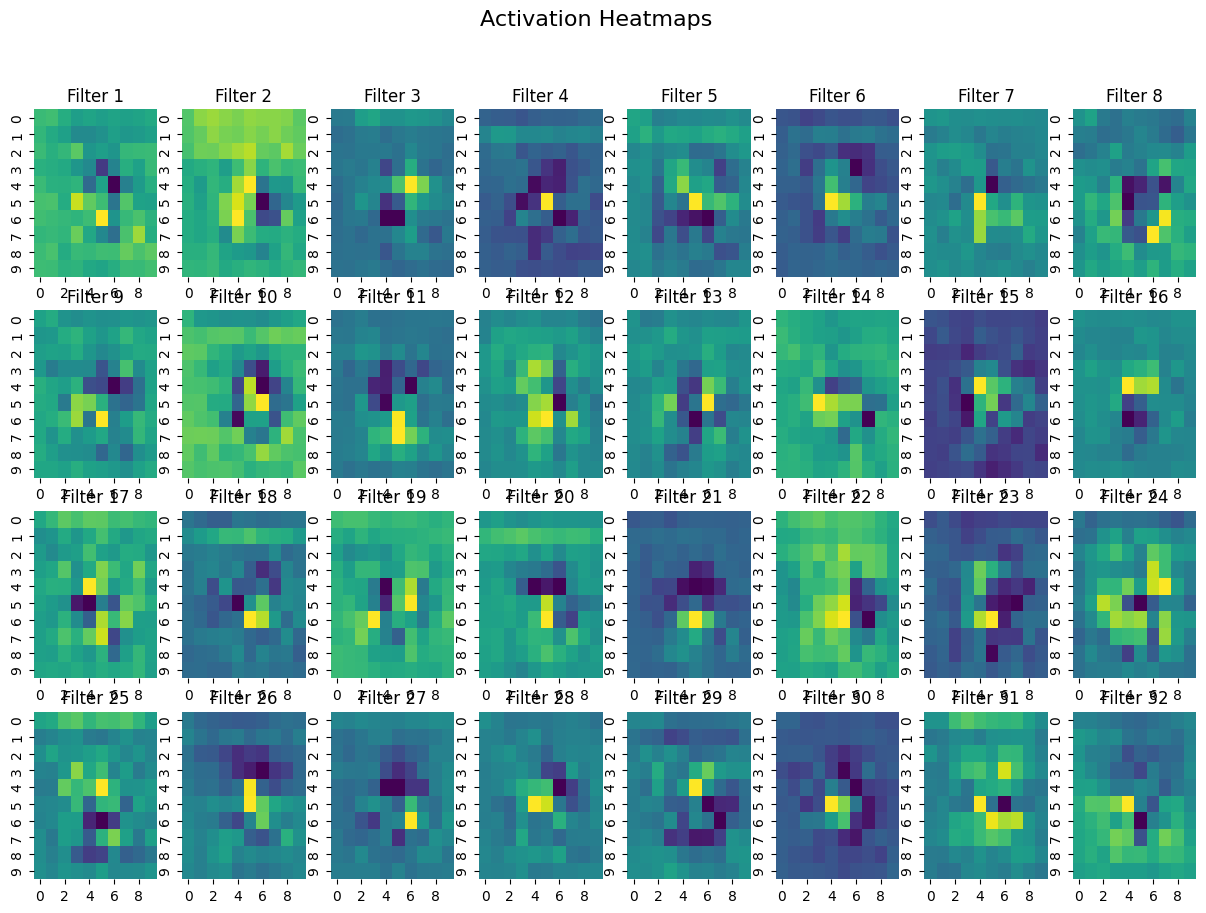

In [6]:
activations=extractor(image)[0].cpu()
activation_np = activations[0][0].squeeze().detach().numpy()

num_filters = activations.shape[1]  # Number of filters in the layer

plt.figure(figsize=(15, 10))
for i in range(min(32, num_filters)):
    plt.subplot(4, 8, i+1)  # 32 slots
    sns.heatmap(activations[0, i].detach().numpy(), cmap='viridis', annot=False, cbar=False)
    plt.title(f'Filter {i+1}')

plt.suptitle('Activation Heatmaps', fontsize=16)
plt.show()